# Interactive Analysis of Climate Data

In this notebook we will perform some interactive explorations of two different datasets:

1. A monthly aggregation of the ERA5 reanalysis, hosted locally on this hub as a single NetCDF file accessible from the `~/shared/climate-data` directory.
1. A cloud-hosted version of the [Multi-Scale Ultra High Resolution (MUR) Sea Surface Temperature (SST)](https://registry.opendata.aws/mur) in Zarr format.

**Acknowledgment:** virtually all the content of this demo notebook is based on work, code and data provided by [Dr. Chelle Gentemann](https://cgentemann.github.io), lead of the [NASA Transform to Open Science (TOPS) initiative](https://science.nasa.gov/open-science/transform-to-open-science). Further refinements to the code made by [Facundo Sapienza](https://github.com/facusapienza21).

In [4]:
# stdlib imports
import os
import warnings
from pathlib import Path

# Third-party tools
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

# Configure various options in our tools
warnings.simplefilter("ignore")  # filter some warning messages

plt.plot([]); plt.close('all') # workaround for bug in matplotlib-inline

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

# Location of our shared data files
DATA_DIR = Path.home()/Path('shared/climate-data')

## ERA 5 monthly data

Let's see what's in our climate data directory:

In [5]:
!ls -lh {DATA_DIR}

total 468M
-rw-r--r-- 1 jovyan jovyan 468M Sep 30  2021 era5_monthly_2deg_aws_v20210920.nc
-rw-r--r-- 1 jovyan jovyan  75K Sep 30  2021 monthly_in_situ_co2_mlo.csv
-rw-r--r-- 1 jovyan jovyan  50K Sep 30  2021 monthly_in_situ_co2_mlo_cleaned.csv


In [6]:
era5 = xr.open_dataset(DATA_DIR / "era5_monthly_2deg_aws_v20210920.nc")
era5

<xarray.Dataset>
Dimensions:                                                                                   (
                                                                                               time: 504,
                                                                                               latitude: 90,
                                                                                               longitude: 180)
Coordinates:
  * time                                                                                      (time) datetime64[ns] ...
  * latitude                                                                                  (latitude) float32 ...
  * longitude                                                                                 (longitude) float32 ...
Data variables: (12/15)
    air_pressure_at_mean_sea_level                                                            (time, latitude, longitude) float32 ...
    air_temperature_at_2_metres                                                               (time, latitude, longitude) float32 ...
    air_temperature_at_2_metres_1hour_Maximum                                                 (time, latitude, longitude) float32 ...
    air_temperature_at_2_metres_1hour_Minimum                                                 (time, latitude, longitude) float32 ...
    dew_point_temperature_at_2_metres                                                         (time, latitude, longitude) float32 ...
    eastward_wind_at_100_metres                                                               (time, latitude, longitude) float32 ...
    ...                                                                                        ...
    northward_wind_at_100_metres                                                              (time, latitude, longitude) float32 ...
    northward_wind_at_10_metres                                                               (time, latitude, longitude) float32 ...
    precipitation_amount_1hour_Accumulation                                                   (time, latitude, longitude) float32 ...
    sea_surface_temperature                                                                   (time, latitude, longitude) float32 ...
    snow_density                                                                              (time, latitude, longitude) float32 ...
    surface_air_pressure                                                                      (time, latitude, longitude) float32 ...
Attributes:
    institution:  ECMWF
    source:       Reanalysis
    title:        ERA5 forecasts

### Snow density in space and time

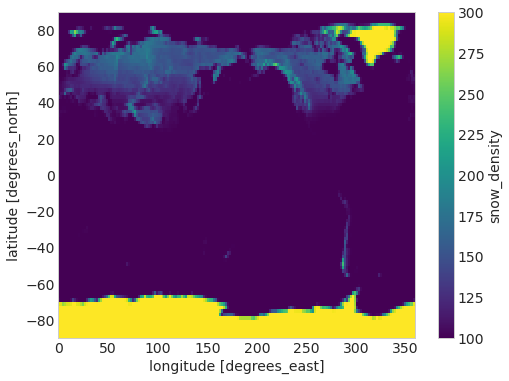

In [17]:
mean_map = era5.mean("time")  # takes the mean across all variables in the dataset
mean_map.snow_density.plot();

In [23]:
snow = era5.snow_density
snow

<xarray.DataArray 'snow_density' (time: 504, latitude: 90, longitude: 180)>
array([[[300., 300., ..., 300., 300.],
        [300., 300., ..., 300., 300.],
        ...,
        [100., 100., ..., 100., 100.],
        [100., 100., ..., 100., 100.]],

       [[300., 300., ..., 300., 300.],
        [300., 300., ..., 300., 300.],
        ...,
        [100., 100., ..., 100., 100.],
        [100., 100., ..., 100., 100.]],

       ...,

       [[300., 300., ..., 300., 300.],
        [300., 300., ..., 300., 300.],
        ...,
        [100., 100., ..., 100., 100.],
        [100., 100., ..., 100., 100.]],

       [[300., 300., ..., 300., 300.],
        [300., 300., ..., 300., 300.],
        ...,
        [100., 100., ..., 100., 100.],
        [100., 100., ..., 100., 100.]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T11:30:00 ... 2020-12-16T11:30:00
  * latitude   (latitude) float32 -88.88 -86.88 -84.88 ... 85.12 87.12 89.12
  * longitude  (longitude) float32 0.875 2.875 4.875 6.875 ... 354.9 356.9 358.9
Attributes:
    long_name:       Snow density
    nameCDM:         Snow_density_surface
    nameECMWF:       Snow density
    product_type:    analysis
    shortNameECMWF:  rsn
    standard_name:   snow_density
    units:           kg m**-3

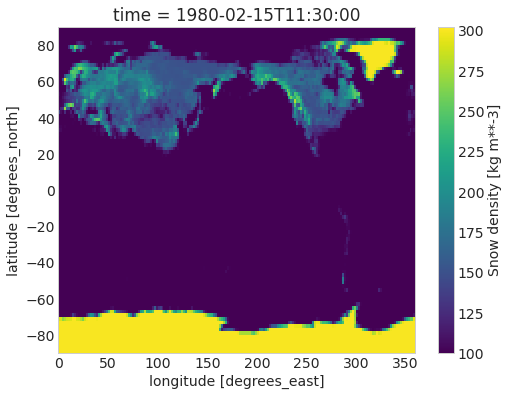

In [19]:
snow.sel(time='1980-02').plot();

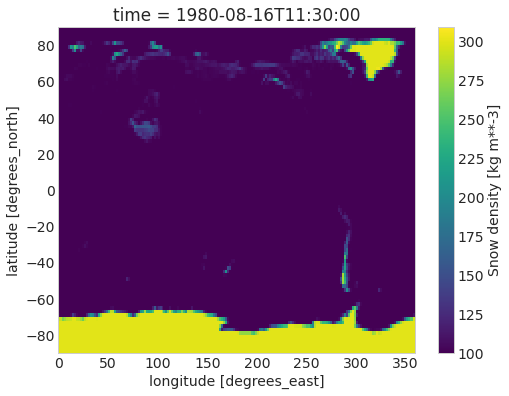

In [24]:
snow.sel(time='1980-08').plot();

Let's look at the temporal evolution of the snow density, say in the Northern hemisphere, by taking instead a spatial average for the northern latitudes:

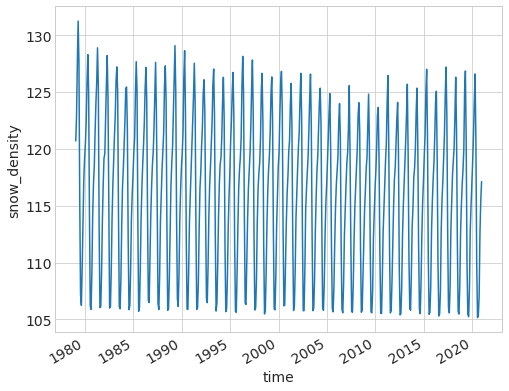

In [25]:
t_snow_north = snow.sel(latitude=slice(0, 90)).mean(('latitude', 'longitude'))
t_snow_north.plot();

and the corresponding figure for the southern hemisphere is:

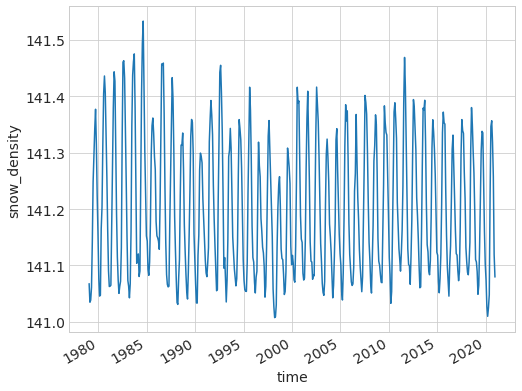

In [26]:
t_snow_south = snow.sel(latitude=slice(-90, 0)).mean(('latitude', 'longitude')) # SOLUTION
t_snow_south.plot();

## The West Coast Heat Wave in 2014-2016

In 2016 [Dr. Chelle Gentemann](https://cgentemann.github.io) and collaborators published:

> Gentemann, Chelle L., Fewings, Melanie R. and García‐Reyes, Marisol. "[Satellite sea surface temperatures along the West Coast of the United States during the 2014–2016 northeast Pacific marine heat wave.](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016GL071039)" _Geophysical Research Letters_ 44, no. 1 (2017): 312-319. [DOI: 10.1002/2016GL071039](https://doi.org/10.1002/2016GL071039).

This paper explorese the heat wave in the ocean off the California coast in 2014-2016. At the time, the author's analysis was performed using Matlab to process scientific data. To make Figure 1, here are the following steps:
- Download 4 TB of data from NASA PO.DAAC data archive via FTP
- Go through each day of data and subset to the West Coast Region to reduce size and save each subsetted day
- Go through 2002-2012 and create a daily climatology and save all 365 days of the climatology
- Go through each day of data and calculate the anomaly and save each day's anomaly

This whole process took about 1-2 months.

Below we will see how, using MUR SST data on AWS Open Data Program and Python tools, we can start this process very easily. The full replication of the real figures in the paper was a homework assignment for my Spring'22 Stat 159 course at Berkeley (with most students _not_ being earth/climate scientists).

In [7]:
# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [8]:
xlat1, xlat2 = 33, 48
xlon1, xlon2 = (
    -132,
    -118,
)
date1, date2 = "2002-01-01", "2012-12-31"

blanco = {"name": "Cape Blanco", "lat": 42.837, "lon": -124.563}
mendo = {"name": "Cape Mendocino", "lat": 40.44, "lon": -124.408}
newport = {"name": "Newport", "lat": 45, "lon": -124.061}
mont = {"name": "Monterey", "lat": 36.598, "lon": -121.8922}
sbarb = {"name": "Santa Barbara", "lat": 34.417, "lon": -119.700}

**Amazon Open Data Program [MUR SST](https://registry.opendata.aws/mur/)**

NASA JPL MUR Level 4 SST dataset in [Zarr](https://zarr.readthedocs.io/en/stable/) format.\
There are two version of this data:
- The zarr-v1/ directory contains a zarr store chunked (6443, 100, 100) along the dimensions (time, lat, lon).
- The zarr/ directory contains a zarr store chunked (5,1799,3600) along the dimensions (time, lat, lon).

What is chunking and why does it matter? Read [this](https://www.unidata.ucar.edu/blogs/developer/en/entry/chunking_data_why_it_matters).

In [9]:
file_aws = "https://mur-sst.s3.us-west-2.amazonaws.com/zarr-v1"
file_aws_time = "https://mur-sst.s3.us-west-2.amazonaws.com/zarr"

In [10]:
%%time
ds_sst = xr.open_zarr(file_aws, consolidated=True)
ds_sst

CPU times: user 776 ms, sys: 105 ms, total: 880 ms
Wall time: 1.38 s


,Array,Chunk
Bytes,15.19 TiB,123.53 MiB
Shape,"(6443, 17999, 36000)","(5, 1799, 3600)"
Count,141791 Tasks,141790 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,15.19 TiB,123.53 MiB
Shape,"(6443, 17999, 36000)","(5, 1799, 3600)"
Count,141791 Tasks,141790 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [11]:
%%time
ds_sst_time = xr.open_zarr(file_aws_time, consolidated=True)
ds_sst_time

CPU times: user 601 ms, sys: 24.8 ms, total: 626 ms
Wall time: 988 ms


,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,15.19 TiB,245.78 MiB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


Subset all the data to just the West Coast region

In [12]:
subset = ds_sst.sel(lat=slice(xlat1, xlat2), lon=slice(xlon1, xlon2))
subset

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 1501, lon: 1401)
Coordinates:
  * lat               (lat) float32 33.0 33.01 33.02 33.03 ... 47.98 47.99 48.0
  * lon               (lon) float32 -132.0 -132.0 -132.0 ... -118.0 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(5, 294, 1401), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(5, 294, 1401), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(5, 294, 1401), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(5, 294, 1401), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

This is the general look of the figures in the paper (just ploting the basic SST data, without any anomaly computation, that will come next):

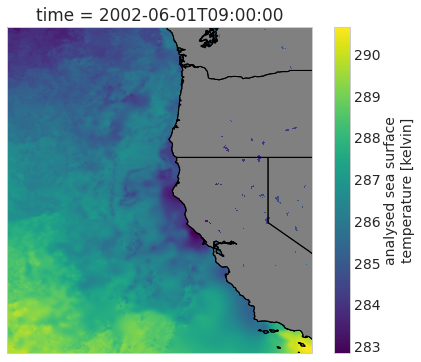

In [13]:
ax = plt.subplot(projection=crs)
subset.analysed_sst[0, :, :].plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"));

Let's start reproducing the actual analysis that leads to Figure 1 in the paper. We will do just one panel here, it takes a bit of time (and memory!) to replicate the full figure.

In [14]:
years_now = [2014, 2015, 2016]

dsT_clim = subset.sel(time = subset.time.dt.year.isin(np.r_[2002:2013]))
dsT_now  = subset.sel(time = subset.time.dt.year.isin(years_now))

In [15]:
dsT_month_clim = dsT_clim.groupby(dsT_clim.time.dt.month).mean()
dsT_month_clim_sd = dsT_clim.groupby(dsT_clim.time.dt.month).std()
dsT_month_clim

<xarray.Dataset>
Dimensions:           (month: 12, lat: 1501, lon: 1401)
Coordinates:
  * lat               (lat) float32 33.0 33.01 33.02 33.03 ... 47.98 47.99 48.0
  * lon               (lon) float32 -132.0 -132.0 -132.0 ... -118.0 -118.0
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    analysed_sst      (month, lat, lon) float32 dask.array<chunksize=(1, 294, 1401), meta=np.ndarray>
    analysis_error    (month, lat, lon) float32 dask.array<chunksize=(1, 294, 1401), meta=np.ndarray>
    mask              (month, lat, lon) float32 dask.array<chunksize=(1, 294, 1401), meta=np.ndarray>
    sea_ice_fraction  (month, lat, lon) float32 dask.array<chunksize=(1, 294, 1401), meta=np.ndarray>

In the paper, we see the September 2016 data has an easily identifyable structure:

![SST Anomaly](data/sst-anomaly-sep-2016.png)

Let's see if we can quickly replicate something that is scientifically consistent with this figure (the original was created with matlab and various thresholding choices we won't deal with here, so it won't match perfectly):

CPU times: user 44.7 s, sys: 22.2 s, total: 1min 6s
Wall time: 1min 25s


Text(0.6, 0.9, 'Sep')

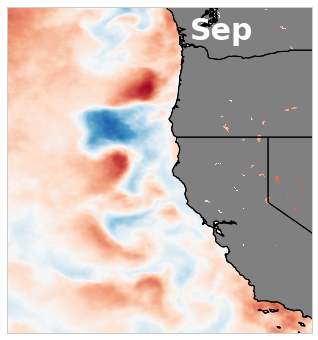

In [16]:
%%time 
import calendar
year = 2016
month = 9

ax = plt.subplot(projection=crs)

(dsT_now.sel(time=f'{year}-{month:02}').analysed_sst.mean('time') - 
 dsT_month_clim.sel(month=month).analysed_sst).plot(ax=ax, vmin=-2.5, vmax=2.5, 
                                                    cmap="RdBu_r", add_colorbar=False, 
                                                    add_labels=False)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))

ax.text(0.6, 0.9, calendar.month_abbr[month], 
        color='white', fontsize=30, weight='bold', transform=ax.transAxes);